In [1]:
import pandas as pd

# Read the data
openpl = pd.read_csv('openpowerlifting.csv', dtype=object, low_memory=False)

# Define the columns to be removed
columns_to_remove = [
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg' ]

# Remove the specified columns
openpl.drop(columns=columns_to_remove, inplace=True)

# Filter rows based on specified criteria for USPA and USAPL
uspa_criteria = ((openpl['Federation'] == 'USPA') & 
                 (openpl['Country'] == 'USA') & 
                 (openpl['State'] == 'IL') & 
                 (openpl['Event'] == 'SBD') & 
                 (openpl['Equipment'] == 'Raw') & 
                 (openpl['Division'] == 'Open') &      
                 (~openpl['Place'].isin(['DQ', 'DD'])))

usapl_criteria = ((openpl['Federation'] == 'USAPL') & 
                  (openpl['Country'] == 'USA') & 
                  (openpl['State'] == 'IL') & 
                  (openpl['Event'] == 'SBD') & 
                  (openpl['Equipment'] == 'Raw') & 
                  ((openpl['Division'] == 'FR-O') | (openpl['Division'] == 'MR-O')) &      
                  (~openpl['Place'].isin(['DQ', 'DD'])))

# Apply the filters and concatenate the tables
merged_table = pd.concat([openpl.loc[uspa_criteria], openpl.loc[usapl_criteria]])

# Convert selected columns to float data type
columns_to_convert = ['Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
                      'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']
merged_table[columns_to_convert] = merged_table[columns_to_convert].astype(float)

# Convert 'Place' column to integer
merged_table['Place'] = merged_table['Place'].astype(int)

# Adjust display settings to show all columns
#pd.set_option('display.max_columns', None)

# DATA CLEANING
# Replace NaN values with '' for object columns
object_columns = merged_table.select_dtypes(include='object').columns
merged_table[object_columns] = merged_table[object_columns].fillna('')

# Replace NaN values with 0 for integer and float columns
numerical_columns = merged_table.select_dtypes(include=['int', 'float']).columns
merged_table[numerical_columns] = merged_table[numerical_columns].fillna(0)

# Delete rows where 'AgeClass' is blank
# merged_table.dropna(subset=['AgeClass'], inplace=True)
# Delete rows where 'AgeClass' is ''
merged_table = merged_table[merged_table['AgeClass'] != '']
#print(merged_table['AgeClass'].unique())

merged_table['Date'] = pd.to_datetime(merged_table['Date'])
# Display the first 40 rows of the DataFrame
# Extract year from 'Date' column and create a new column
merged_table['Year'] = merged_table['Date'].dt.year
# Get the index of the 'Date' column
date_index = openpl.columns.get_loc('Date')

# Convert 'AgeClass' to categorical data type
#merged_table['AgeClass'] = merged_table['AgeClass'].astype('category')

# Conversion factor from kg to lb
kg_to_lb = 2.2046

# Convert columns representing weights from kg to lb
columns_to_convert_to_lb = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']
merged_table[columns_to_convert_to_lb] *= kg_to_lb

# Define a dictionary with the mapping of old column names to new column names
column_name_mapping = {
    'Best3SquatKg': 'Best3Squat(lb)',
    'Best3BenchKg': 'Best3Bench(lb)',
    'Best3DeadliftKg': 'Best3Deadlift(lb)',
    'TotalKg': 'Total(lb)'
}

# Change column names using the rename() method
merged_table.rename(columns=column_name_mapping, inplace=True)

# Display the updated DataFrame
print(merged_table.head())

# Export the merged DataFrame as a new CSV file
merged_table.to_csv('merged_data_v1.csv', index=False)
merged_table.head()



                     Name Sex Event Equipment   Age AgeClass BirthYearClass  \
335584        Abby Citrin   F   SBD       Raw  28.5    24-34          24-39   
335585         Sarah Cupp   F   SBD       Raw  35.5    35-39          24-39   
335589  Stephanie Vasquez   F   SBD       Raw  35.5    35-39          24-39   
335604      Jacob Pezzuto   M   SBD       Raw  25.5    24-34          24-39   
335606         Eddie Cupp   M   SBD       Raw  36.5    35-39          24-39   

       Division  BodyweightKg WeightClassKg  ...  State  Federation  \
335584     FR-O          62.0            63  ...     IL       USAPL   
335585     FR-O          66.4            72  ...     IL       USAPL   
335589     FR-O         103.2           84+  ...     IL       USAPL   
335604     MR-O          82.2            83  ...     IL       USAPL   
335606     MR-O          74.6            83  ...     IL       USAPL   

        ParentFederation       Date  MeetCountry  MeetState  MeetTown  \
335584               IPF 

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,Year
335584,Abby Citrin,F,SBD,Raw,28.5,24-34,24-39,FR-O,62.0,63,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335585,Sarah Cupp,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.4,72,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335589,Stephanie Vasquez,F,SBD,Raw,35.5,35-39,24-39,FR-O,103.2,84+,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335604,Jacob Pezzuto,M,SBD,Raw,25.5,24-34,24-39,MR-O,82.2,83,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018
335606,Eddie Cupp,M,SBD,Raw,36.5,35-39,24-39,MR-O,74.6,83,...,IL,USAPL,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018


In [2]:
merged_table["Body Weight (lbs)"] = merged_table["BodyweightKg"]*2.2046
#merged_table["Weight Class (lbs)"] = merged_table["WeightClassKg"]*2.2046
merged_table["Weight Group"] = ""
merged_table.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,Year,Body Weight (lbs),Weight Group
335584,Abby Citrin,F,SBD,Raw,28.5,24-34,24-39,FR-O,62.0,63,...,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018,136.68520,
335585,Sarah Cupp,F,SBD,Raw,35.5,35-39,24-39,FR-O,66.4,72,...,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018,146.38544,
335589,Stephanie Vasquez,F,SBD,Raw,35.5,35-39,24-39,FR-O,103.2,84+,...,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018,227.51472,
335604,Jacob Pezzuto,M,SBD,Raw,25.5,24-34,24-39,MR-O,82.2,83,...,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018,181.21812,
335606,Eddie Cupp,M,SBD,Raw,36.5,35-39,24-39,MR-O,74.6,83,...,IPF,2018-03-10,USA,IA,,Quad City Throw Down,Yes,2018,164.46316,


In [3]:
bins = [0,91,100,154,200,230,300,401]
labels = ['Very Small','Small','Medium','Big','Large','XL','XXL']

merged_table['Weight Group'] = pd.cut(merged_table['Body Weight (lbs)'],bins=bins, labels=labels)

merged_table.tail(20)

#merged_table['Body Weight (lbs)'].max()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,Year,Body Weight (lbs),Weight Group
561521,Zachary McGillis,M,SBD,Raw,23.5,24-34,24-39,MR-O,72.10,74,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,158.95166,Big
561525,Jose Velgara-Rivera Jr,M,SBD,Raw,17.5,18-19,14-18,MR-O,73.90,74,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,162.91994,Big
561529,Manuel Ocana,M,SBD,Raw,27.5,24-34,24-39,MR-O,77.80,83,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,171.51788,Big
561531,Elijah Lengjak,M,SBD,Raw,20.5,20-23,19-23,MR-O,81.90,83,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,180.55674,Big
561546,Alfredo Escobar,M,SBD,Raw,17.5,18-19,14-18,MR-O,87.80,93,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,193.56388,Big
561549,Hubert Szymaszek,M,SBD,Raw,19.5,20-23,19-23,MR-O,88.90,93,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,195.98894,Big
561555,William Coyne,M,SBD,Raw,30.5,24-34,24-39,MR-O,101.60,105,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,223.98736,Large
561559,Dane Weinberg,M,SBD,Raw,20.5,20-23,19-23,MR-O,96.80,105,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,213.40528,Large
561565,Alan Johansen,M,SBD,Raw,23.5,24-34,24-39,MR-O,123.20,120+,...,IPF,2021-05-15,USA,WI,,Mayhem Open,Yes,2021,271.60672,XL
562140,Sarah Breeser,F,SBD,Raw,29.5,24-34,24-39,FR-O,84.30,90,...,,2023-12-09,USA,WI,,Liftmas Open,Yes,2023,185.84778,Big


Weight Group
Big           886
Medium        503
Large         381
XL            234
XXL            25
Very Small      1
Small           1
Name: count, dtype: int64


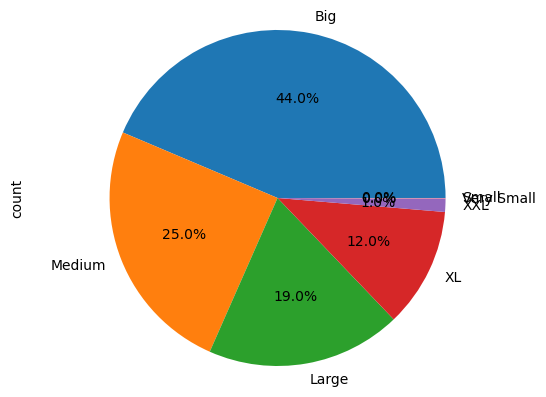

In [4]:
import matplotlib.pyplot as plt

# Assuming 'Weight Group' is a categorical column in your DataFrame 'merged_table'
x = merged_table['Weight Group'].value_counts()

# 'labels' is misspelled, and it should be a list, not a set
labels = ['very small', 'small', 'medium', 'Big', 'Large', 'XL', 'XXL']

x.plot(kind='pie', autopct=lambda x: f'{int(x + 0.5):.1f}%', startangle=0)
print(x)
# Ensure the aspect ratio is equal to make the pie circular
plt.axis('equal')
# Show the plot
plt.show()


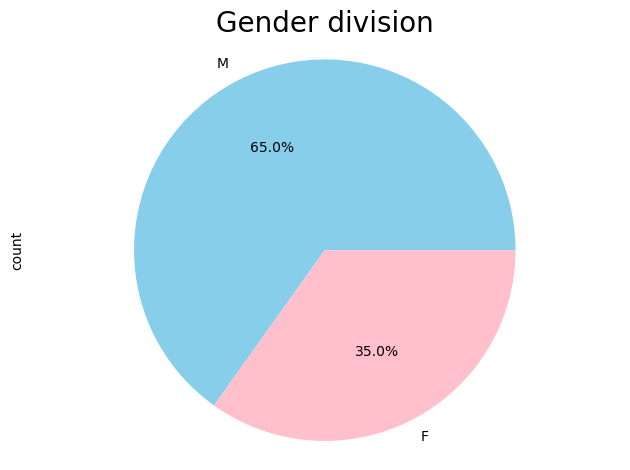

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt
import math
# Assuming you have a DataFrame named df with a column 'Sex' indicating the gender of mice

# Count the number of mice for each gender
gender_counts = merged_table['Sex'].value_counts()

# Create a pie plot using Pandas built-in plot function
gender_counts.plot(kind='pie', autopct=lambda x: f'{int(x + 0.5):.1f}%', colors=['skyblue', 'pink'], startangle=0)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Gender division',fontsize=20)
# Show plot
plt.tight_layout()
plt.show()

AgeClass
24-34    208
20-23     98
35-39     27
18-19     16
45-49      6
dtype: int64


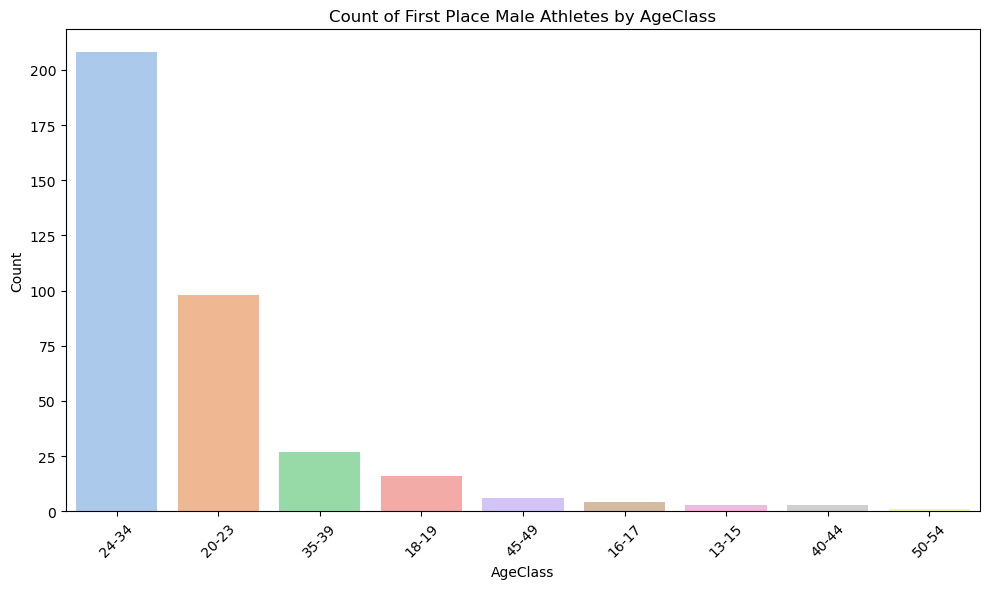

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter rows with non-blank 'AgeClass'
firstPlace = merged_table[(merged_table.Place == 1) & (merged_table.AgeClass != '')]
firstPlace = merged_table[(merged_table.Place == 1)]
firstPlaceMale = firstPlace[(firstPlace.Sex == 'M')]
firstPlaceFemale = firstPlace[(firstPlace.Sex == 'F')]

# Count values for each AgeClass
ageclass_counts = firstPlaceMale.groupby('AgeClass').size()

# Sort AgeClass counts in descending order
ageclass_counts = ageclass_counts.sort_values(ascending=False)

# Display the count values for each AgeClass
print(ageclass_counts.head())

# Use a pastel color palette from seaborn
pastel_palette = sns.color_palette("pastel")

# Create a bar chart with pastel colors
plt.figure(figsize=(10, 6))
sns.barplot(x=ageclass_counts.index, y=ageclass_counts.values, palette=pastel_palette)
plt.title('Count of First Place Male Athletes by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()



AgeClass
24-34    187
20-23     36
35-39     17
18-19     13
16-17      8
Name: count, dtype: int64


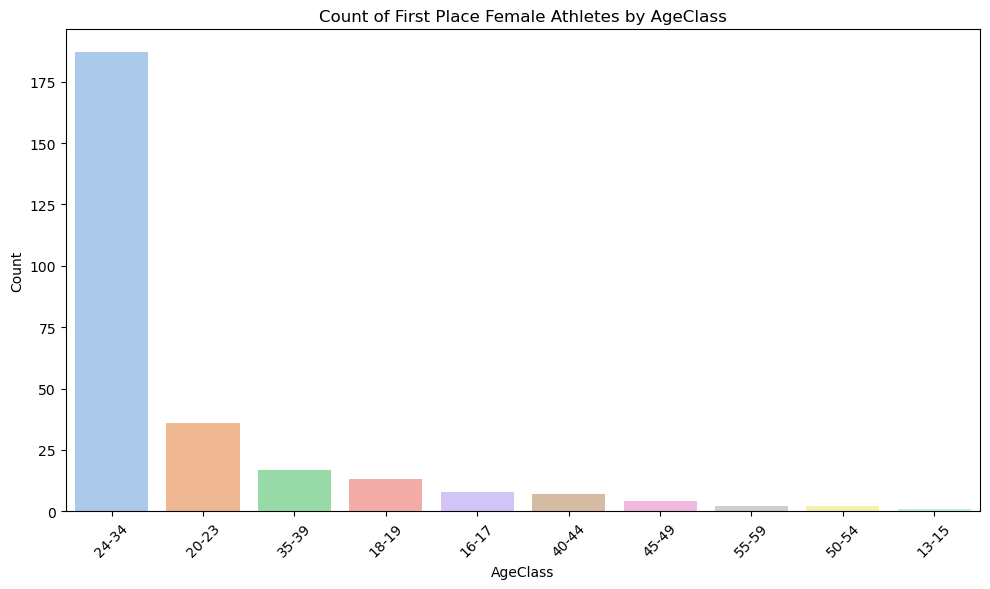

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

firstPlace = merged_table[(merged_table.Place == 1)]
firstPlaceMale = firstPlace[(firstPlace.Sex == 'M')]
firstPlaceFemale = firstPlace[(firstPlace.Sex == 'F')]

# Count values for each AgeClass for females
female_ageclass_counts = firstPlaceFemale['AgeClass'].value_counts()

# Display the count values for each AgeClass
print(female_ageclass_counts.head())

# Sort AgeClass counts in descending order
female_ageclass_counts = female_ageclass_counts.sort_values(ascending=False)

# Use a pastel color palette from seaborn
pastel_palette = sns.color_palette("pastel")

# Create a bar chart with pastel colors for female athletes
plt.figure(figsize=(10, 6))
sns.barplot(x=female_ageclass_counts.index, y=female_ageclass_counts.values, palette=pastel_palette)
plt.title('Count of First Place Female Athletes by AgeClass')
plt.xlabel('AgeClass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


   AgeClass  Male_Avg_squat  Female_Avg_squat
0     13-15      300.682944        314.155500
1     16-17      357.078394        315.427385
2     18-19      412.995067        245.546828
3     20-23      444.815724        263.274540
4     24-34      461.453481        265.519751
5     35-39      453.959402        259.991439
6     40-44      471.692542        230.748133
7     45-49      430.221206        225.420350
8     50-54      418.086643        187.391000
9     55-59      329.808160        204.614438
10    65-69        0.000000        115.741500


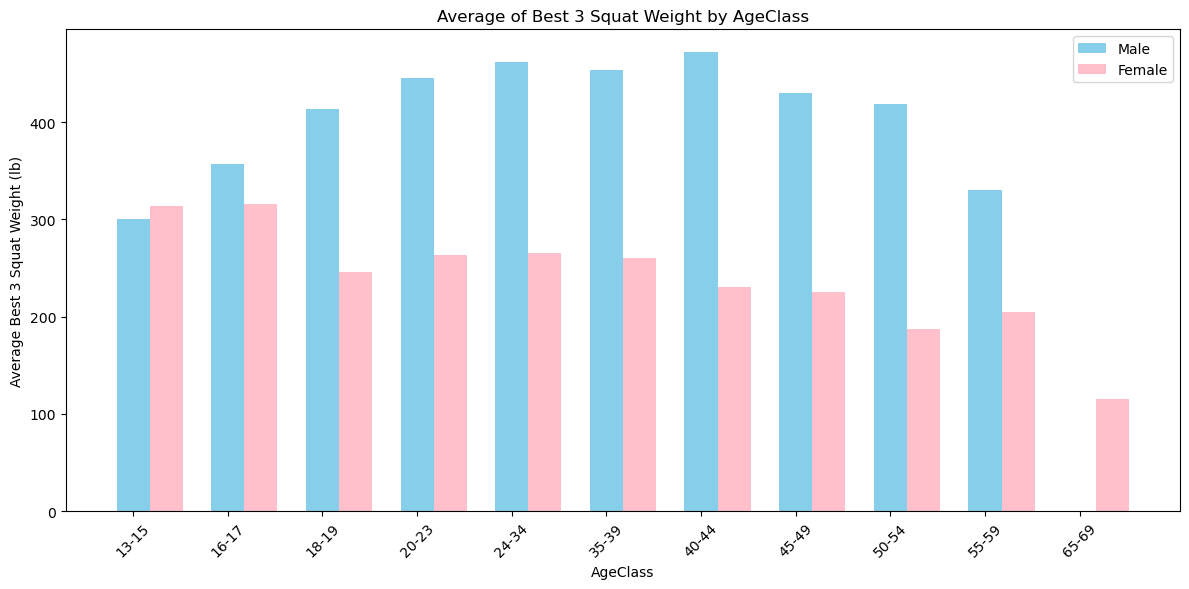

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3Squat(lb)' for male athletes
male_avg_squat = male_athletes.groupby('AgeClass')['Best3Squat(lb)'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3Squat(lb) for female athletes
female_avg_squat = female_athletes.groupby('AgeClass')['Best3Squat(lb)'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_squat.index) | set(female_avg_squat.index))

# Reindex average series with all AgeClasses
male_avg_squat = male_avg_squat.reindex(all_age_classes, fill_value=0)
female_avg_squat = female_avg_squat.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_squat': male_avg_squat.values,
    'Female_Avg_squat': female_avg_squat.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_squat))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_squat.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_squat.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Squat Weight (lb)')
plt.title('Average of Best 3 Squat Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


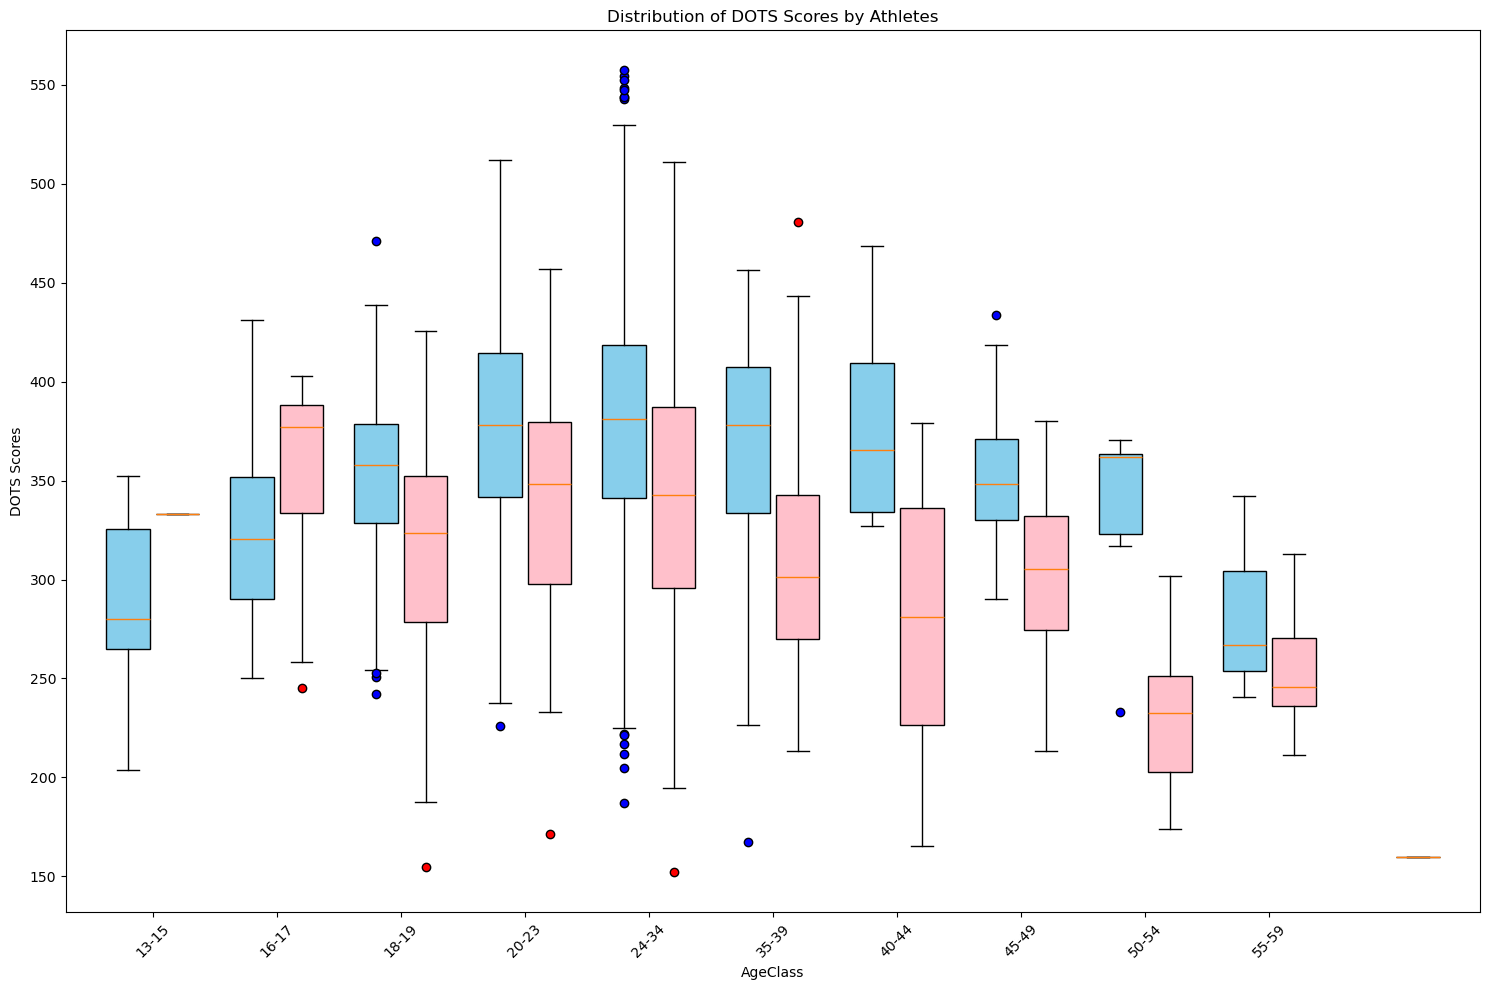

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male and female athletes
male_athletes = merged_table[merged_table['Sex'] == 'M']
female_athletes = merged_table[merged_table['Sex'] == 'F']

# Extract data for each lift type
m_dots_data = male_athletes.groupby('AgeClass')['Dots'].apply(list)
f_dots_data = female_athletes.groupby('AgeClass')['Dots'].apply(list)

# Create positions for the boxplots
x = range(1, len(m_dots_data) + 1)

plt.figure(figsize=(15, 10))  # Set the figure size

# Plot boxplots for male athletes
plt.boxplot(m_dots_data.values, positions=[i - 0.2 for i in x], widths=0.35, patch_artist=True, boxprops=dict(facecolor='skyblue'), flierprops=dict(marker='o', markerfacecolor='blue', markersize=6), showfliers=True)
# Plot boxplots for female athletes
plt.boxplot(f_dots_data.values, positions=[i + 0.2 for i in range(1, len(f_dots_data) + 1)], widths=0.35, patch_artist=True, boxprops=dict(facecolor='pink'), flierprops=dict(marker='o', markerfacecolor='red', markersize=6), showfliers=True)

# Add labels and title
plt.title('Distribution of DOTS Scores by Athletes')
plt.xlabel('AgeClass')
plt.ylabel('DOTS Scores')

# Set x-axis tick positions and labels
plt.xticks(x, m_dots_data.index, rotation=45)


# Add custom legend
#plt.legend(['Male DOTS', 'Female DOTS'])

# Add labels and title
plt.title('Distribution of DOTS Scores by Athletes')
plt.tight_layout()
plt.show()



   AgeClass  Male_Avg_Bench  Female_Avg_Bench
0     13-15      172.081278        181.879500
1     16-17      223.299258        168.736692
2     18-19      252.794133        138.927810
3     20-23      281.841366        142.094020
4     24-34      305.366924        142.640347
5     35-39      305.888250        142.223024
6     40-44      333.445750        133.010867
7     45-49      308.968206        140.543250
8     50-54      285.810643        112.067167
9     55-59      240.007453        128.142375
10    65-69        0.000000         99.207000


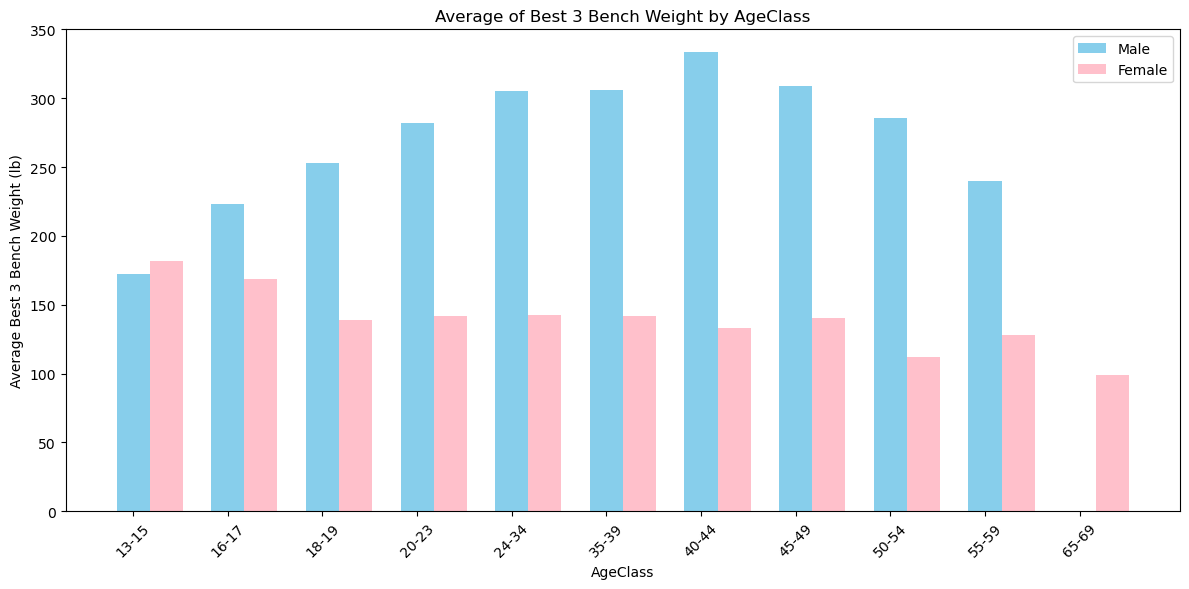

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3Bench(lb)' for male athletes
male_avg_bench = male_athletes.groupby('AgeClass')['Best3Bench(lb)'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3Bench(lb)' for female athletes
female_avg_bench = female_athletes.groupby('AgeClass')['Best3Bench(lb)'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_bench.index) | set(female_avg_bench.index))

# Reindex average series with all AgeClasses
male_avg_bench = male_avg_bench.reindex(all_age_classes, fill_value=0)
female_avg_bench = female_avg_bench.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_Bench': male_avg_bench.values,
    'Female_Avg_Bench': female_avg_bench.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_bench))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_bench.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_bench.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Bench Weight (lb)')
plt.title('Average of Best 3 Bench Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


   AgeClass  Male_Avg_deadlift  Female_Avg_deadlift
0     13-15         352.123611           374.782000
1     16-17         415.366682           348.072423
2     18-19         471.539444           303.322552
3     20-23         506.673590           308.106440
4     24-34         527.515168           316.042819
5     35-39         518.013787           304.879728
6     40-44         547.016375           279.249333
7     45-49         485.660412           294.865250
8     50-54         486.586714           236.075917
9     55-59         420.270247           255.595813
10    65-69           0.000000           132.276000


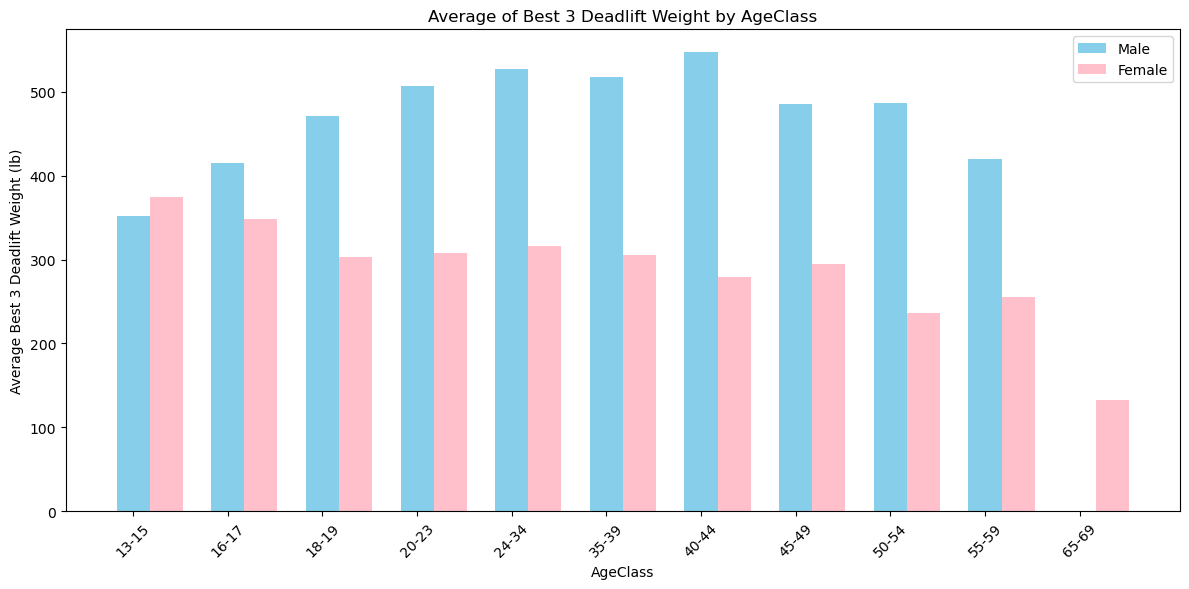

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

# Calculate the average of 'Best3Deadlift(lb)' for male athletes
male_avg_deadlift = male_athletes.groupby('AgeClass')['Best3Deadlift(lb)'].mean()

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

# Calculate the average of 'Best3Deadlift(lb)' for female athletes
female_avg_deadlift = female_athletes.groupby('AgeClass')['Best3Deadlift(lb)'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_deadlift.index) | set(female_avg_deadlift.index))

# Reindex average series with all AgeClasses
male_avg_deadlift = male_avg_deadlift.reindex(all_age_classes, fill_value=0)
female_avg_deadlift = female_avg_deadlift.reindex(all_age_classes, fill_value=0)

# Combine male and female average data into a single DataFrame
average_data = pd.DataFrame({
    'AgeClass': all_age_classes,
    'Male_Avg_deadlift': male_avg_deadlift.values,
    'Female_Avg_deadlift': female_avg_deadlift.values
})
# Delete rows where 'AgeClass' is ''
average_data = average_data[average_data['AgeClass'] != '']

# Display the updated DataFrame
print(average_data)

# Plotting
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Define the positions for male and female bars on the x-axis
male_positions = range(len(male_avg_deadlift))
female_positions = [pos + bar_width for pos in male_positions]

# Plot bars for male athletes
plt.bar(male_positions, male_avg_deadlift.values, width=bar_width, color='skyblue', label='Male')

# Plot bars for female athletes
plt.bar(female_positions, female_avg_deadlift.values, width=bar_width, color='pink', label='Female')

# Add labels and title
plt.xlabel('AgeClass')
plt.ylabel('Average Best 3 Deadlift Weight (lb)')
plt.title('Average of Best 3 Deadlift Weight by AgeClass')
plt.xticks(male_positions, all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


    Year Sex  Count
0   2012   M      1
1   2013   F      3
2   2013   M      4
3   2015   F      6
4   2015   M      1
5   2016   F     91
6   2016   M    141
7   2017   F    104
8   2017   M    158
9   2018   F    110
10  2018   M    126
11  2019   F    111
12  2019   M    210
13  2020   F     30
14  2020   M     41
15  2021   F     48
16  2021   M    131
17  2022   F     86
18  2022   M    239
19  2023   F     86
20  2023   M    223


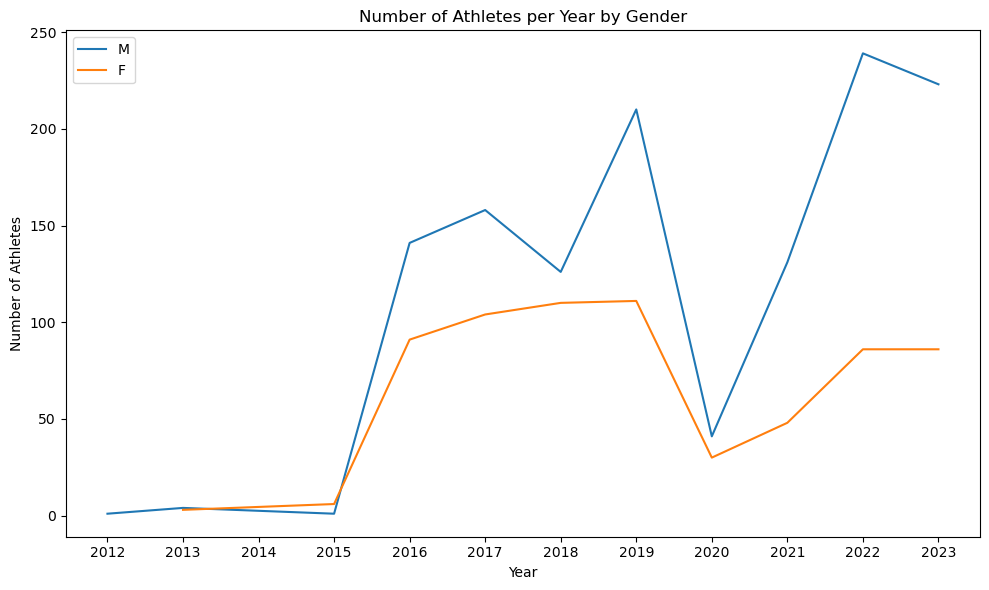

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the data for the year 2024
filtered_table = merged_table[merged_table['Year'] != 2024]

# Specify the range of years to display
years_to_display = range(filtered_table['Year'].min(), filtered_table['Year'].max() + 1)

# Group the data by year, gender, and age class, and count the number of entries in each group
athletes_per_year_gender = filtered_table.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Display the number of athletes per year by gender
print(athletes_per_year_gender)

# Line Plot
plt.figure(figsize=(10, 6))
for gender in ['M', 'F']:
    subset = athletes_per_year_gender[athletes_per_year_gender['Sex'] == gender]
    plt.plot(subset['Year'], subset['Count'], label=gender)
plt.title('Number of Athletes per Year by Gender')
plt.xlabel('Year')
plt.xticks(years_to_display)  # Specify the range of years to display on the x-axis
plt.ylabel('Number of Athletes')
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()



          Average Squat (lb)  Average Bench (lb)  Average Deadlift (lb)
AgeClass                                                               
13-15             300.682944          172.081278             352.123611
16-17             357.078394          223.299258             415.366682
18-19             412.995067          252.794133             471.539444
20-23             444.815724          281.841366             506.673590
24-34             461.453481          305.366924             527.515168
35-39             453.959402          305.888250             518.013787
40-44             471.692542          333.445750             547.016375
45-49             430.221206          308.968206             485.660412
50-54             418.086643          285.810643             486.586714
55-59             329.808160          240.007453             420.270247


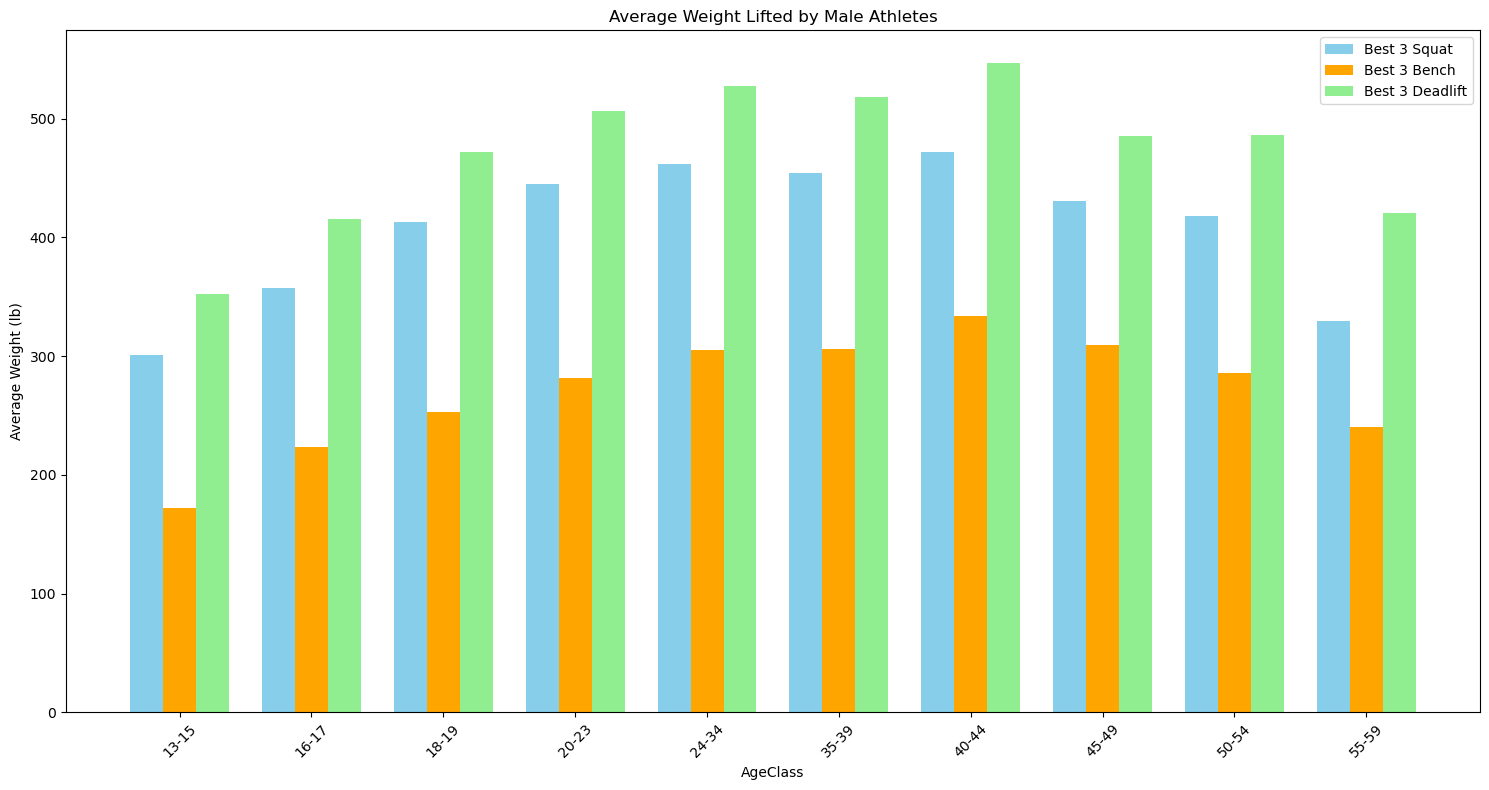

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
male_athletes = merged_table[merged_table['Sex'] == 'M']

# Calculate the average of 'Best3Squat(lb)', 'Best3Bench(lb)', and 'Best3Deadlift(lb)' for male athletes
male_avg_squat = male_athletes.groupby('AgeClass')['Best3Squat(lb)'].mean()
male_avg_bench = male_athletes.groupby('AgeClass')['Best3Bench(lb)'].mean()
male_avg_deadlift = male_athletes.groupby('AgeClass')['Best3Deadlift(lb)'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(male_avg_squat.index) | set(male_avg_bench.index) | set(male_avg_deadlift.index))

# Reindex average series with all AgeClasses
male_avg_squat = male_avg_squat.reindex(all_age_classes, fill_value=0)
male_avg_bench = male_avg_bench.reindex(all_age_classes, fill_value=0)
male_avg_deadlift = male_avg_deadlift.reindex(all_age_classes, fill_value=0)

# Merge the three series into one DataFrame
male_avg_lifts = pd.DataFrame({
    'Average Squat (lb)': male_avg_squat,
    'Average Bench (lb)': male_avg_bench,
    'Average Deadlift (lb)': male_avg_deadlift
})

# Print the merged DataFrame
print(male_avg_lifts)

# Create positions for the bars
x = range(len(all_age_classes))

# Set the width of the bars
bar_width = 0.25

plt.figure(figsize=(15, 8))  # Set the figure size
# Plot bars for male athletes_squat
plt.bar(x, male_avg_squat.values, width=bar_width, color='skyblue', label='Best 3 Squat', align='center')

# Plot bars for male athletes_bench
plt.bar([i + bar_width for i in x], male_avg_bench.values, width=bar_width, color='orange', label='Best 3 Bench', align='center')

# Plot bars for male athletes_deadlift
plt.bar([i + bar_width * 2 for i in x], male_avg_deadlift.values, width=bar_width, color='lightgreen', label='Best 3 Deadlift', align='center')

# Add labels and title
plt.title('Average Weight Lifted by Male Athletes')
plt.xlabel('AgeClass')
plt.ylabel('Average Weight (lb)')
plt.xticks([i + bar_width for i in x], all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


          Average Squat (lb)  Average Bench (lb)  Average Deadlift (lb)
AgeClass                                                               
13-15             314.155500          181.879500             374.782000
16-17             315.427385          168.736692             348.072423
18-19             245.546828          138.927810             303.322552
20-23             263.274540          142.094020             308.106440
24-34             265.519751          142.640347             316.042819
35-39             259.991439          142.223024             304.879728
40-44             230.748133          133.010867             279.249333
45-49             225.420350          140.543250             294.865250
50-54             187.391000          112.067167             236.075917
55-59             204.614438          128.142375             255.595813
65-69             115.741500           99.207000             132.276000


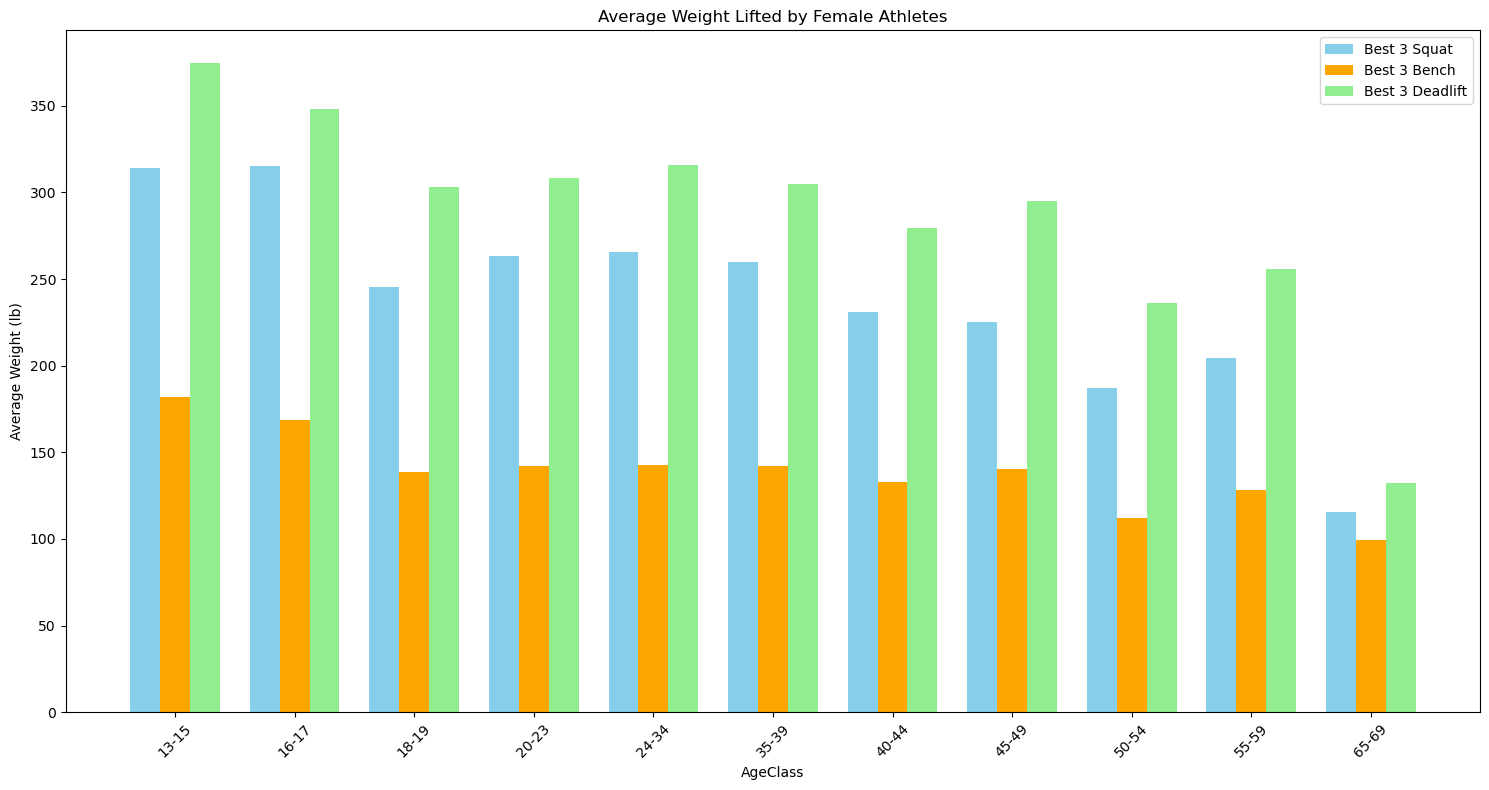

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Delete rows where 'AgeClass' is blank
merged_table.dropna(subset=['AgeClass'], inplace=True)

# Filter male athletes
female_athletes = merged_table[merged_table['Sex'] == 'F']

# Calculate the average of 'Best3Squat(lb)', 'Best3Bench(lb)', and 'Best3Deadlift(lb)' for male athletes
female_avg_squat = female_athletes.groupby('AgeClass')['Best3Squat(lb)'].mean()
female_avg_bench = female_athletes.groupby('AgeClass')['Best3Bench(lb)'].mean()
female_avg_deadlift = female_athletes.groupby('AgeClass')['Best3Deadlift(lb)'].mean()

# Get all unique AgeClasses
all_age_classes = sorted(set(female_avg_squat.index) | set(female_avg_bench.index) | set(female_avg_deadlift.index))

# Reindex average series with all AgeClasses
female_avg_squat = female_avg_squat.reindex(all_age_classes, fill_value=0)
female_avg_bench = female_avg_bench.reindex(all_age_classes, fill_value=0)
female_avg_deadlift = female_avg_deadlift.reindex(all_age_classes, fill_value=0)
# Merge the three series into one DataFrame
female_avg_lifts = pd.DataFrame({
    'Average Squat (lb)': female_avg_squat,
    'Average Bench (lb)': female_avg_bench,
    'Average Deadlift (lb)': female_avg_deadlift
})

# Print the merged DataFrame
print(female_avg_lifts)
# Create positions for the bars
x = range(len(all_age_classes))

# Set the width of the bars
bar_width = 0.25

plt.figure(figsize=(15, 8))  # Set the figure size
# Plot bars for male athletes_squat
plt.bar(x, female_avg_squat.values, width=bar_width, color='skyblue', label='Best 3 Squat', align='center')

# Plot bars for male athletes_bench
plt.bar([i + bar_width for i in x], female_avg_bench.values, width=bar_width, color='orange', label='Best 3 Bench', align='center')

# Plot bars for male athletes_deadlift
plt.bar([i + bar_width * 2 for i in x], female_avg_deadlift.values, width=bar_width, color='lightgreen', label='Best 3 Deadlift', align='center')

# Add labels and title
plt.title('Average Weight Lifted by Female Athletes')
plt.xlabel('AgeClass')
plt.ylabel('Average Weight (lb)')
plt.xticks([i + bar_width for i in x], all_age_classes, rotation=45)  # Set x-axis tick positions and labels

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


The correlation between bodyweight (lb) and the average Total (lb) is 0.74


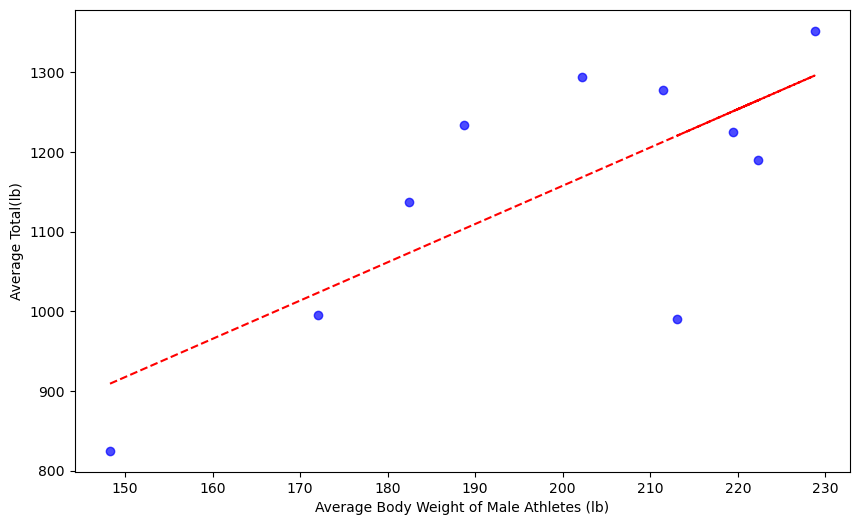

In [15]:
# Calculate the correlation coefficient and a linear regression model 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Filter male athletes
male_athletes = merged_table[(merged_table.Sex == 'M')]

## Calculate the average of ' for male athletes
male_avg_bodyweight = male_athletes.groupby('AgeClass')['Body Weight (lbs)'].mean()
# Calculate the average of 'Best3Squat(lb)' for male athletes
male_avg_total = male_athletes.groupby('AgeClass')['Total(lb)'].mean()


# Calculate correlation coefficient
m_correlation = male_avg_bodyweight.corr(male_avg_total)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(male_avg_bodyweight, male_avg_total)
regress_values = male_avg_bodyweight * slope + intercept

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(male_avg_bodyweight, male_avg_total, color='b', alpha=0.7)
plt.plot(male_avg_bodyweight, regress_values, color='r', linestyle='--')

# Add labels
plt.xlabel('Average Body Weight of Male Athletes (lb)')
plt.ylabel('Average Total(lb)')

# Add correlation coefficient to the plot
print(f'The correlation between bodyweight (lb) and the average Total (lb) is {m_correlation:.2f}')
# Show plot
plt.show()

The correlation between bodyweight (lb) and the average Total (lb) is 0.43


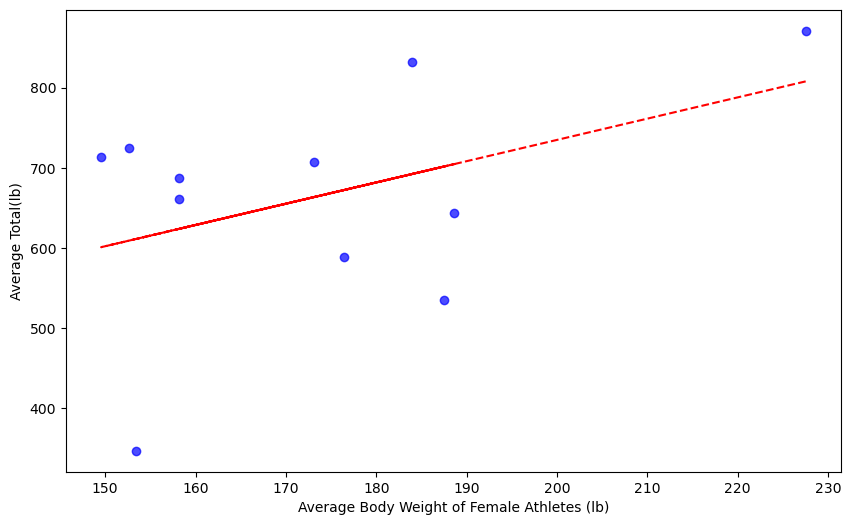

In [16]:
# Calculate the correlation coefficient and a linear regression model 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Filter female athletes
female_athletes = merged_table[(merged_table.Sex == 'F')]

female_avg_bodyweight = female_athletes.groupby('AgeClass')['Body Weight (lbs)'].mean()
# Calculate the average of 'Best3Squat(lb) for female athletes
female_avg_total = female_athletes.groupby('AgeClass')['Total(lb)'].mean()

# Calculate correlation coefficient
f_correlation = female_avg_bodyweight.corr(female_avg_total)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(female_avg_bodyweight, female_avg_total)
regress_values = female_avg_bodyweight * slope + intercept

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(female_avg_bodyweight, female_avg_total, color='b', alpha=0.7)
plt.plot(female_avg_bodyweight, regress_values, color='r', linestyle='--')

# Add labels
plt.xlabel('Average Body Weight of Female Athletes (lb)')
plt.ylabel('Average Total(lb)')

# Add correlation coefficient to the plot
print(f'The correlation between bodyweight (lb) and the average Total (lb) is {f_correlation:.2f}')
# Show plot
plt.show()